  Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

             

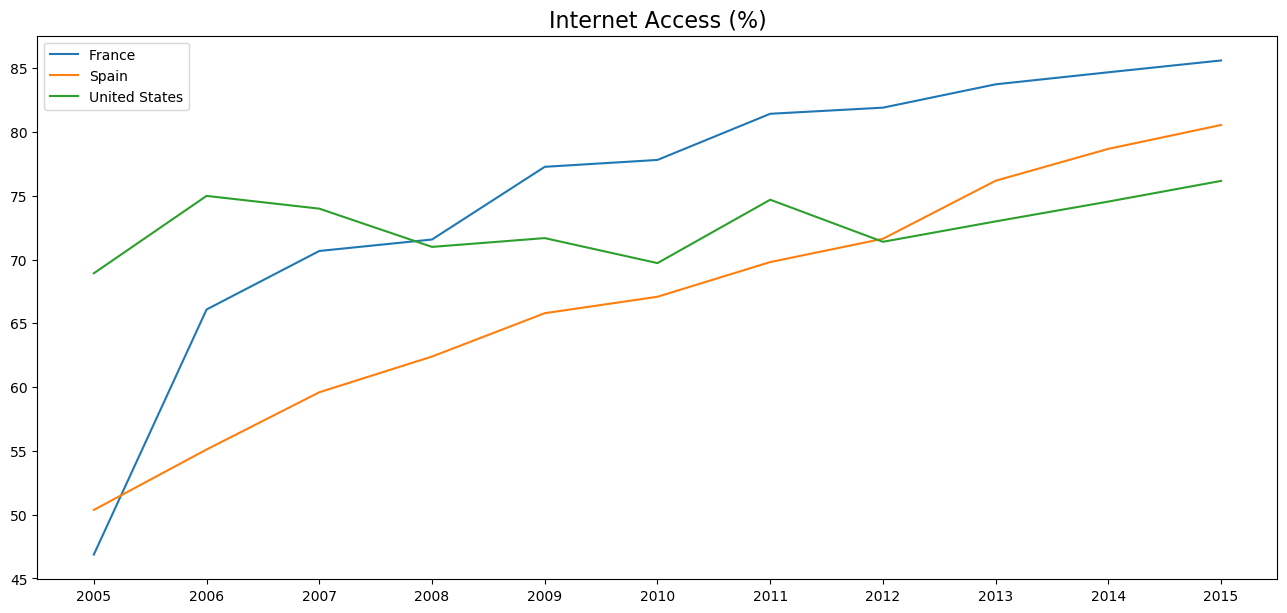

         Country Name Country Code                   Indicator Name  \
411855        Iceland          ISL  Internet users (per 100 people)   
507145  Liechtenstein          LIE  Internet users (per 100 people)   
169965        Bermuda          BMU  Internet users (per 100 people)   
144310        Bahrain          BHR  Internet users (per 100 people)   
107660        Andorra          AND  Internet users (per 100 people)   

        Indicator Code  1970  1971  1972  1973  1974  1975  ...  2060  2065  \
411855  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
507145  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
169965  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
144310  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
107660  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   

        2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
411855   NaN   NaN   NaN   NaN   N

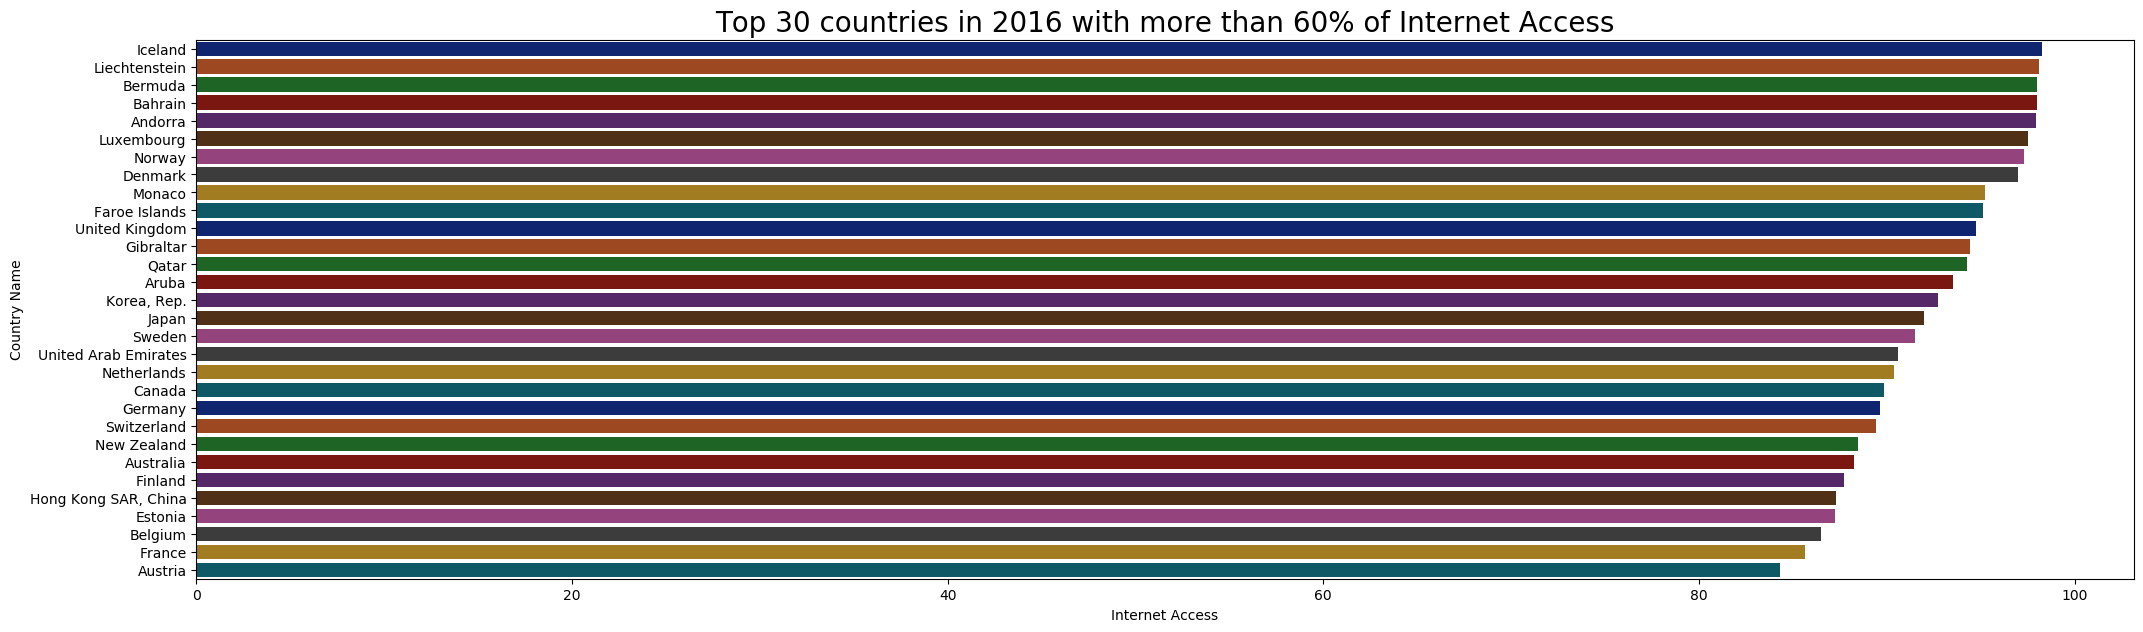

             Country Name Country Code                Indicator Name  \
632687               Oman          OMN  Population growth (annual %)   
313832  Equatorial Guinea          GNQ  Population growth (annual %)   
618027              Niger          NER  Population growth (annual %)   
145242            Bahrain          BHR  Population growth (annual %)   
673002              Qatar          QAT  Population growth (annual %)   

       Indicator Code      1970      1971      1972      1973      1974  \
632687    SP.POP.GROW  3.247144  3.411598  3.594302  3.866656  4.240574   
313832    SP.POP.GROW  0.092044 -1.594625 -3.056522 -4.032582 -4.213563   
618027    SP.POP.GROW  2.804088  2.784301  2.769692  2.770122  2.789172   
145242    SP.POP.GROW  3.135110  3.560874  3.935391  4.426751  5.040971   
673002    SP.POP.GROW  8.218018  8.662779  8.895354  8.588907  7.750587   

            1975  ...  2060  2065  2070  2075  2080  2085  2090  2095  2100  \
632687  4.652369  ...   NaN   NaN   N

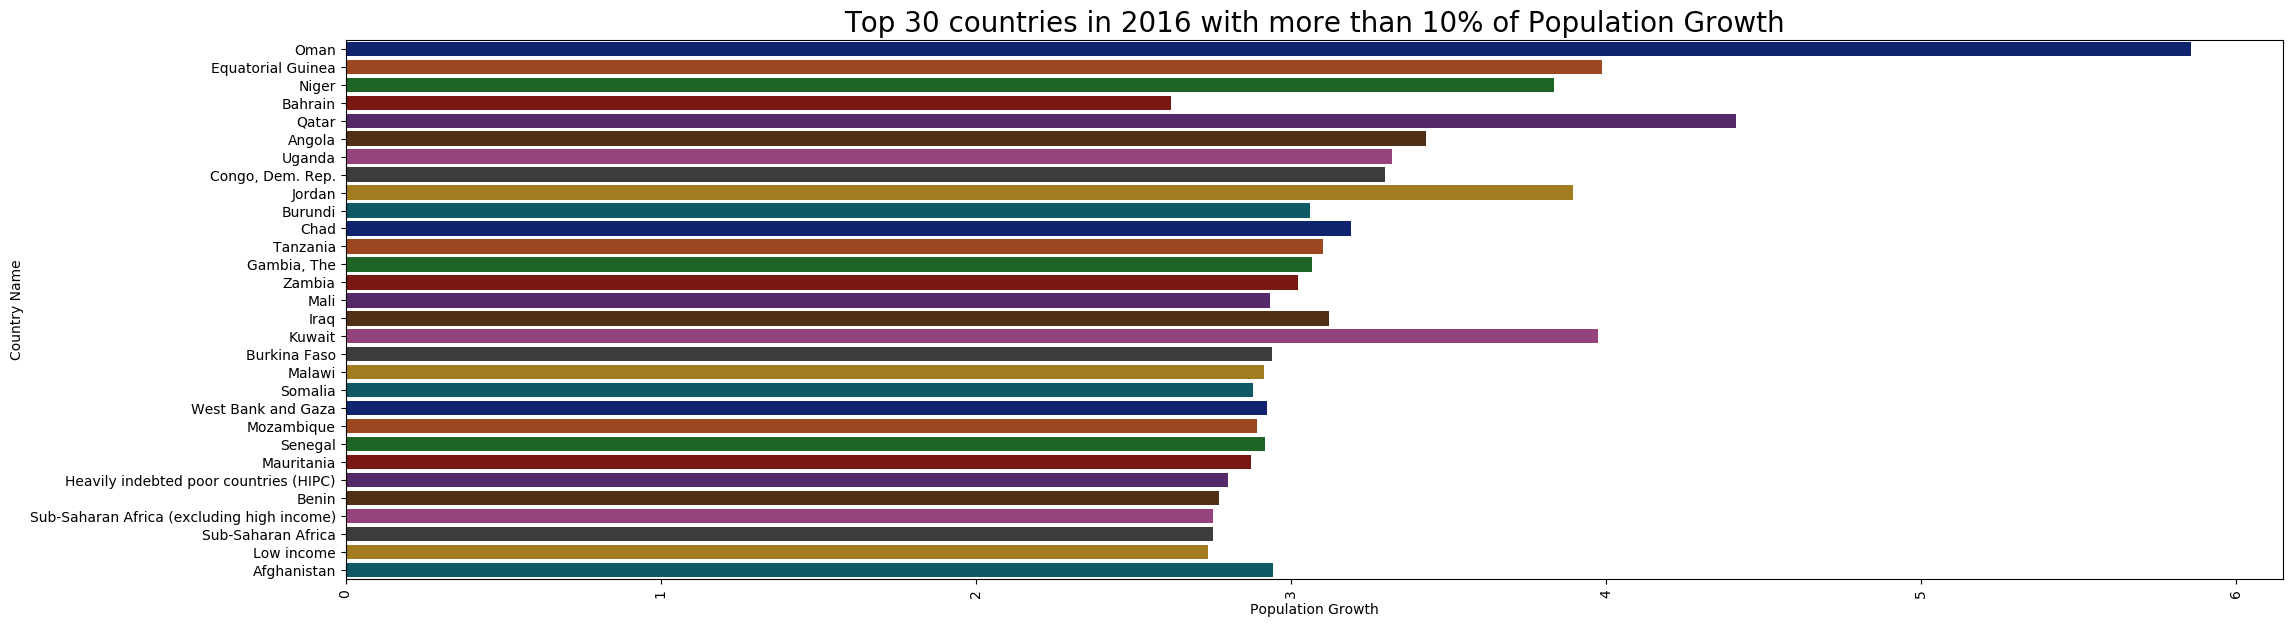

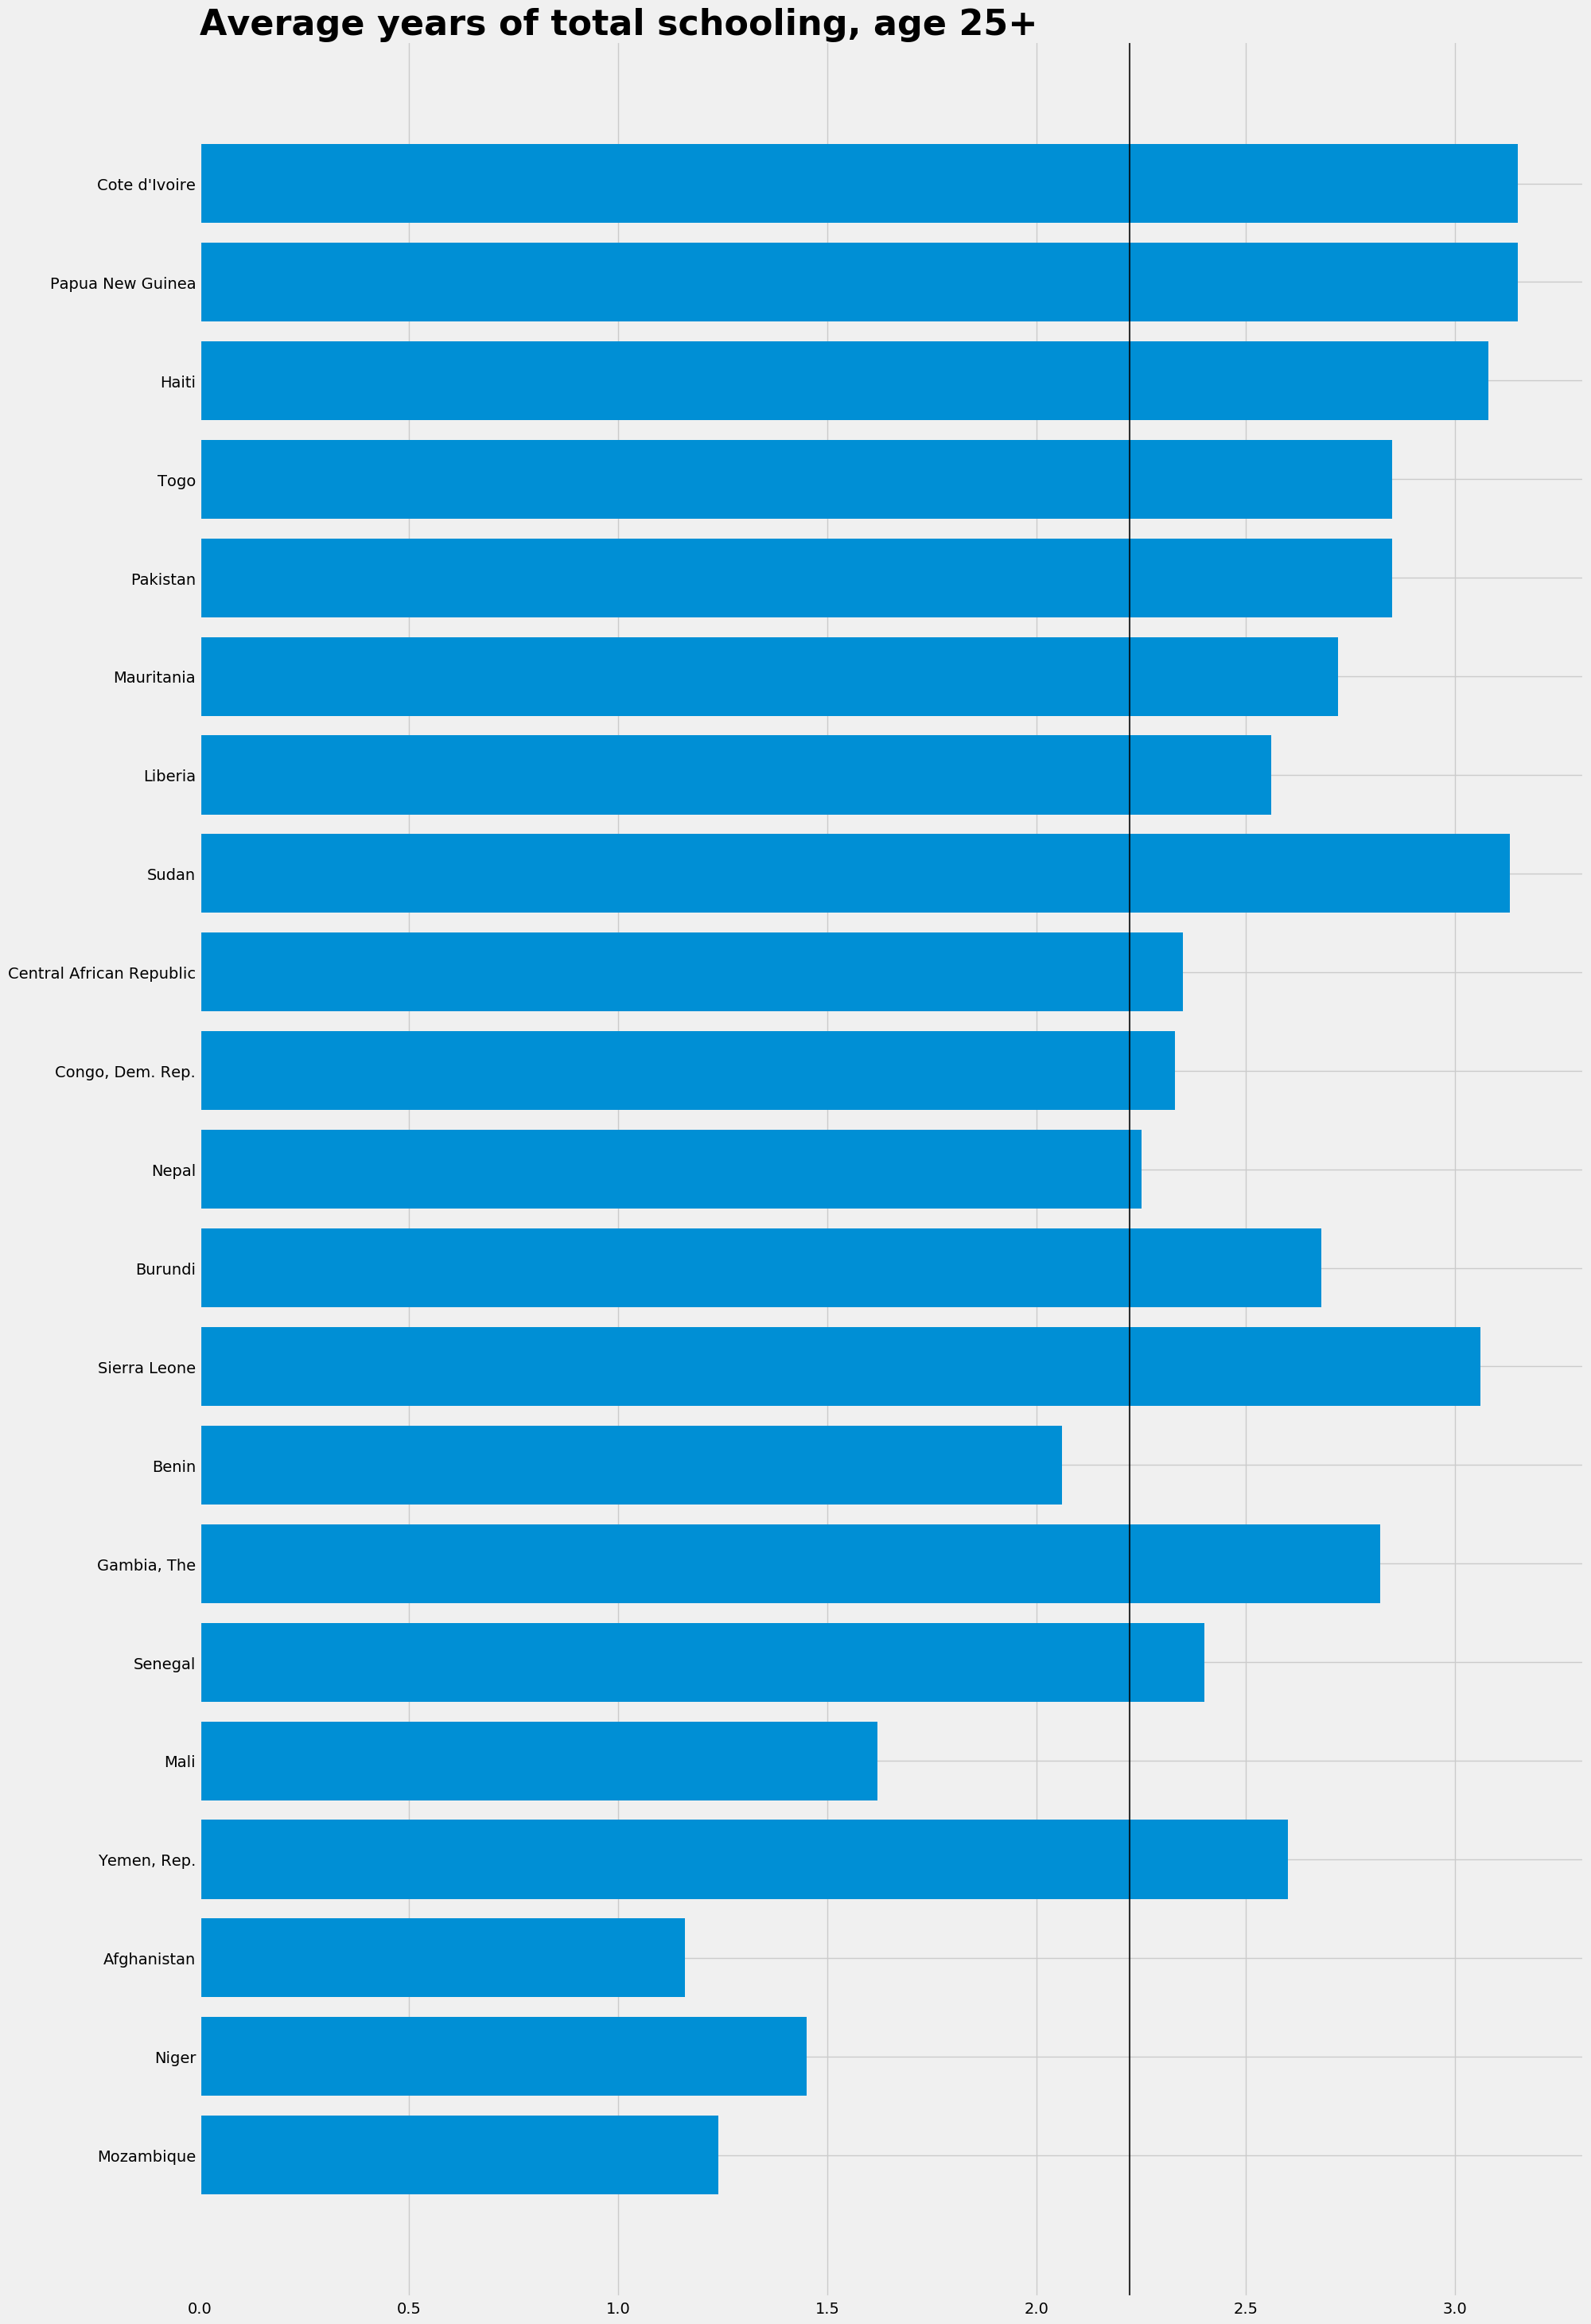

population
                                       Country Name Country Code  \
2533                                     Arab World          ARB   
6198                            East Asia & Pacific          EAS   
9863    East Asia & Pacific (excluding high income)          EAP   
13528                                     Euro area          EMU   
17193                         Europe & Central Asia          ECS   
...                                             ...          ...   
871138                        Virgin Islands (U.S.)          VIR   
874803                           West Bank and Gaza          PSE   
878468                                  Yemen, Rep.          YEM   
882133                                       Zambia          ZMB   
885798                                     Zimbabwe          ZWE   

                2005          2006          2007          2008          2009  \
2533    3.098244e+08  3.171258e+08  3.246935e+08  3.324249e+08  3.401490e+08   
6198    2.12

TypeError: __init__() got an unexpected keyword argument 'labelcolor'

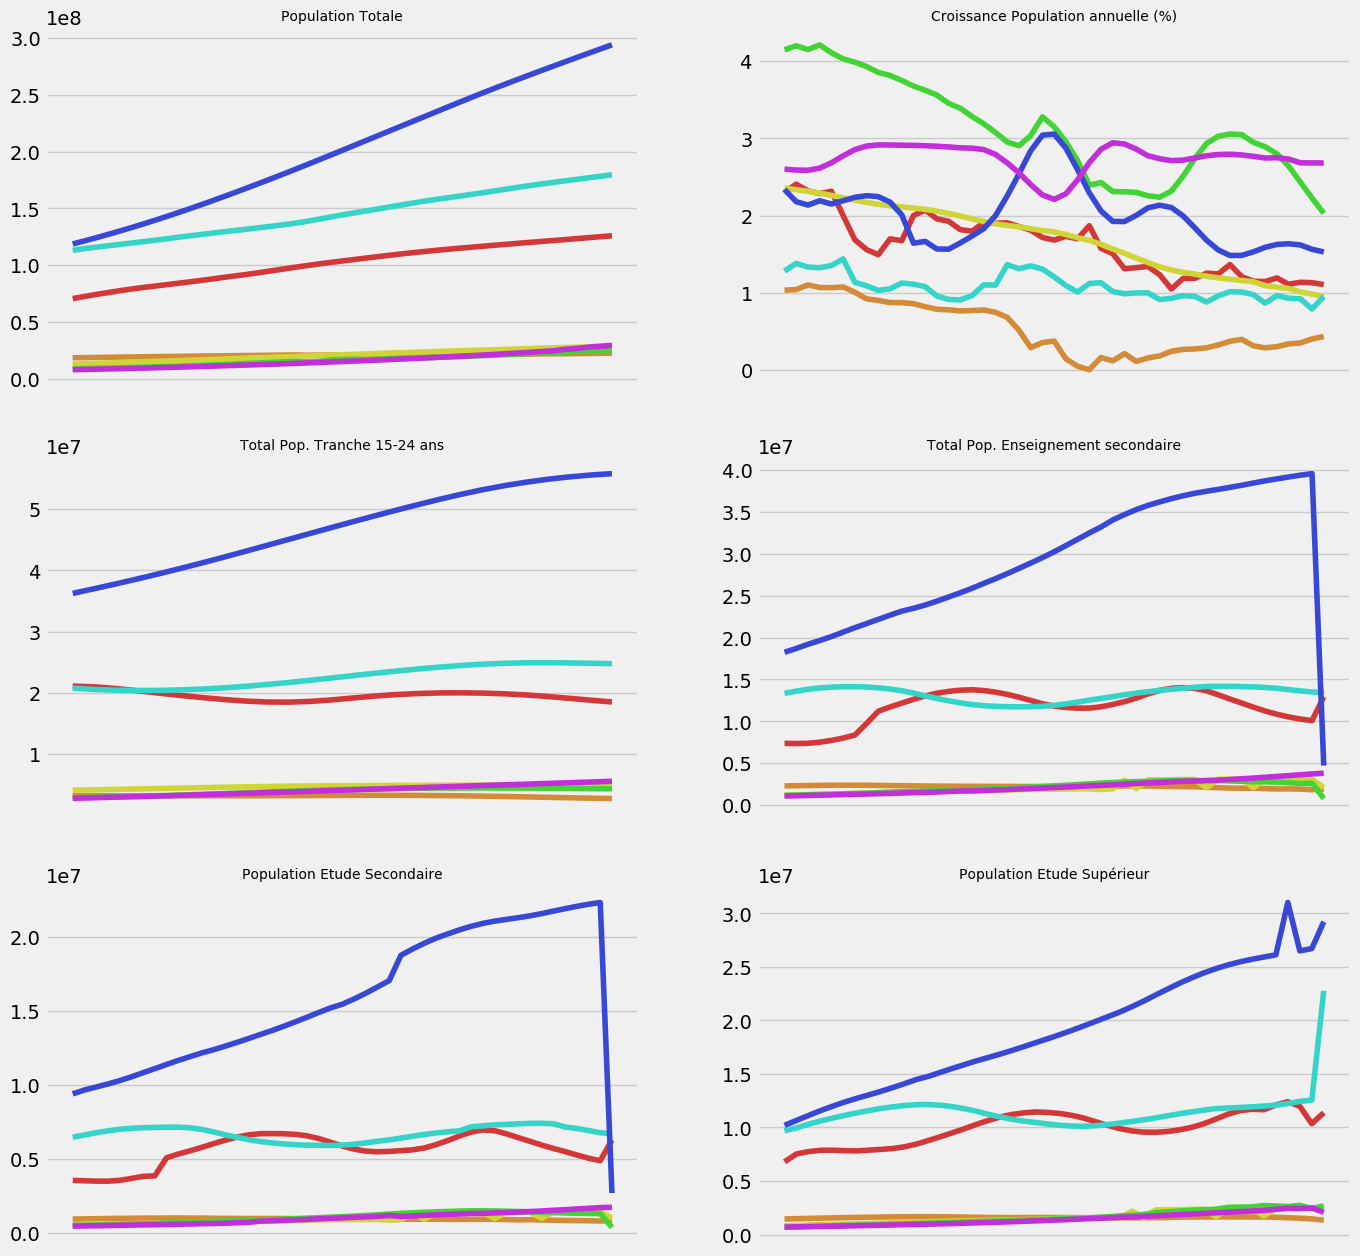

In [2]:
###############################################################################
#
# Description : This program used for Project 2
# EDA Exploratory Data Analysis
# 
# Author : Ali Naama
# Date : 06/11/2021
# Fork from Kaggle
# https://www.kaggle.com/hyunjookim/fork-of-eda-with-education-data-from-world-bank-op
#
###############################################################################

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import time
import matplotlib.style as style
import re
import math
%matplotlib inline  

# Maximum difference between the country revenue and the revenue of the reference country (France) - In percents (%)
MAX_REVENUE_PERCENT_DIFF = 20
REF_COUNTRY_CODE = 'FRA'
# Minimum year to keep in the dataset (has been choosen by analysing the data below)
MIN_YEAR = 2005
MAX_YEAR = 2015

# Reference country code
REF_COUNTRY_CODE = "FRA"

def getlabelindicator(text):
    # Get Label Indicator from Code to French
    if text == 'SP.POP.TOTL':
      text = 'Population Totale'
    if text == 'SP.POP.GROW':
      text = 'Croissance Population annuelle (%)'
    if text == 'SP.POP.1524.TO.UN':
      text = 'Total Pop. Tranche 15-24 ans'
    if text == 'SP.SEC.TOTL.IN':
      text = 'Total Pop. Enseignement secondaire'
    if text == 'SP.SEC.UTOT.IN':
      text = 'Population Etude Secondaire'
    if text == 'SP.TER.TOTL.IN':
      text = 'Population Etude Supérieur'
    if text == 'IT.CMP.PCMP.P2':
      text = 'Ordinateurs personnels pour 100 habitants'
    if text == 'IT.NET.USER.P2':
      text = 'Nombre d\'utilisateurs Internet pour 100 habitants'
    if text == 'SE.ADT.1524.LT.ZS':
      text = 'Taux d\'alphabétisation des 15-24 ans (%)'
    if text == 'BAR.SCHL.2024':
      text = 'Nombre moyen d\'années de scolarité totale, âge 20-24, total'
    if text == 'BAR.SCHL.1519':
      text = 'Nombre total moyen d\'années de scolarisation des 15-19 ans'
    if text == 'BAR.SCHL.25UP':
      text = 'Nombre total moyen d\'années de scolarité des plus de 25 ans'
    if text == 'BAR.SCHL.25UP':
      text = 'Nombre total moyen d\'années de scolarité des plus de 25 ans'
    if text == 'BAR.SCHL.25UP':
      text = 'Nombre total moyen d\'années de scolarité des plus de 25 ans'
    if text == 'NY.GDP.MKTP.PP.CD':
      text = 'PIB par habitant ($ US courants)'
    if text == 'NY.GDP.PCAP.PP.CD':
      text = 'PIB par habitant basé sur la parité de pouvoir d\'achat (PPA)'
    else:
        text = text
    return text


MINIMUM_POPULATION = 2000000
# Data about countries

## Read Data froim csv file

countries = pd.read_csv('Downloads/EdStatsCountry.csv')
countries['Short Name'].unique()

print(countries.head(5))

mobility_cont=pd.read_csv('Downloads/EdStatsData.csv')
mobility_cont['Indicator Name'].unique()
data = mobility_cont
array=['Internet users (per 100 people)']
indicators_names = {
    'IT.NET.USER.P2': 'Utilisateurs Internet (%)',
    'NY.GDP.PCAP.PP.CD': 'PIB par hab (PPA)',
    'SP.POP.1524.TO.UN': 'Population 15-24 ans',
    'SP.POP.GROW': 'Croissance pop. (%)',
    'IT.CMP.PCMP.P2': 'Possesseurs PC (%)',
    'Short Name': 'Country Name'
}

arraycountry = ['France','Spain', 'United States']
mobility=mobility_cont.loc[mobility_cont['Indicator Name'].isin(array)]
mobility_continent=mobility.loc[mobility['Country Name'].isin(arraycountry)]
mobility['Country Name'].unique()
mobility_continent_in=mobility_continent[mobility_continent['Indicator Name'].str.contains('Internet')]
mobility_continent_in = mobility_continent_in[['Country Name','Country Code', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]
print(mobility_continent)
x4=list(range(2005,2016))


# Draw Internet Access

style.use('default')
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors=['black','r','darkred','gold','orange','brown','moccasin','m','darkmagenta','lightslategrey','darkgrey','b', 'indianred','lawngreen','darkgreen']


print(mobility_continent_in.head())

f = plt.figure(figsize=(16,24))
ax=f.add_subplot(311)
ax.set_title('Internet Access (%)', fontsize=16)
#range of country Name to be displayed
for i,j in zip(range(0,3),colors):
    #print(mobility_continent_in.iloc[i, 3:])
    ax.plot(x4,mobility_continent_in.iloc[i,3:])
ax.set_xticks(np.arange(2005,2016,step=1))
ax.legend(mobility_continent_in['Country Name'])
plt.show()

# SP.POP.TOTL-Population, total

#print(mobility_cont.head())


# Top 30 des pays ayant internet en 2015 :

internet_population = mobility_cont.loc[mobility_cont['Indicator Name'].isin(array)]
internet_population = internet_population[internet_population['2016'] > 60].sort_values(by=['2016'], ascending=False)
internet_population['Country Name'].unique()


print(internet_population.head())

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = internet_population['2016'][:30], y =  internet_population['Country Name'][:30], palette = 'dark')
ax.set_xlabel( xlabel = 'Internet Access', fontsize = 10)
ax.set_ylabel(ylabel = 'Country Name', fontsize = 10 )
ax.set_title(label = 'Top 30 countries in 2016 with more than 60% of Internet Access', fontsize = 20)
#plt.xticks(rotation = 90)
plt.show()

# Top 30 des pays ayant une croissance démographique importante :
growth_population = mobility_cont #.loc[mobility_cont['Indicator Name'].isin(indicators_names)]
growth_population = growth_population[growth_population['Indicator Code']=='SP.POP.GROW']
growth_population = growth_population[growth_population['2016'] >= 0].sort_values(by=['2016'], ascending=False)
growth_population['Country Name'].unique()


print(growth_population.head())
print(growth_population['2015'][:30])

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = growth_population['2015'][:30], y =  growth_population['Country Name'][:30], palette = 'dark')
ax.set_xlabel( xlabel = 'Population Growth', fontsize = 10)
ax.set_ylabel(ylabel = 'Country Name', fontsize = 10 )
ax.set_title(label = 'Top 30 countries in 2016 with more than 10% of Population Growth', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


# Schooling Up 24+

# Choose one among numerous indicators: Average years of total schooling, age 25+
schooling = mobility_cont[mobility_cont['Indicator Code'].str.contains('BAR.SCHL.25UP')]
schooling['Indicator Code'].unique()
schooling.head()
schooling = schooling.reset_index(drop=True)
# Draw graph with 2010 data
schooling = schooling.sort_values(by='2010', ascending=True)
import matplotlib.style as style
style.use('fivethirtyeight')



fig, ax = plt.subplots(figsize=(20,35))
mygraph = ax.barh(schooling['Country Name'][:30], schooling['2010'][:30])
plt.axvline(x = np.mean(schooling['2010'][:30]), color = 'black', linewidth = 1.5, alpha = .8)
plt.title('Average years of total schooling, age 25+',fontsize=32,fontweight='bold', loc='left')
plt.show()

# Country # with population exceeding 2 millions
# Step 0 - Retrieving the population data from the main dataset
countries_populations = data[data["Indicator Code"] == "SP.POP.TOTL"]
# Removing years that are not filled and selection years that have data
countries_populations = countries_populations[['Country Name','Country Code', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
print('population')
print(countries_populations)
# Step 1 - Removing columns where all values are NaN
countries_populations.reset_index(inplace=True)
countries_populations.set_index("Country Code", inplace=True)
print(countries_populations.describe())

# Step 2 - Calculating the mean population for each country
countries_populations = countries_populations.mean(axis=1).to_frame()
countries_populations.columns = ["Population"]
print(countries_populations)
# Step 3 - Keeping countries codes
biggest_countries_codes = countries_populations[countries_populations["Population"] >= MINIMUM_POPULATION].index.values

# Finally filtering data
data = data[data["Country Code"].isin(biggest_countries_codes)]

#

# Step 1 - We isolate country code and region from country file and kipping only on our selected countries

regions = (countries[countries["Country Code"].isin(biggest_countries_codes)]
           .set_index("Country Code")
           .filter(items=["Region"]))

population_indicators = ["SP.POP.TOTL", "SP.POP.GROW", "SP.POP.1524.TO.UN", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN","SP.TER.TOTL.IN"]

indicator_analysis_base_data = mobility_cont.copy(deep=True)
indicator_analysis_data = indicator_analysis_base_data.merge(regions, left_on="Country Code", right_index=True)
indicator_analysis_data = indicator_analysis_data[indicator_analysis_data['Indicator Code'].isin(population_indicators)]
# Calculating means
indicator_analysis_data = (indicator_analysis_data.drop(columns=["Country Code"], errors="ignore").groupby(["Region", "Indicator Code"]).mean()).reset_index()
print(indicator_analysis_data)
#indicator_analysis_data = indicator_analysis_data[['Region', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
print(indicator_analysis_data)

#indicator_analysis_data = indicator_analysis_data[['Indicator Code', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#indicator_analysis = indicator_analysis[['Indicator Code', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#print(indicator_analysis_data)

colors = ["#d43737", "#d48b37", "#cfd437", "#42d435", "#35d4c9", "#3848d6", "#c22ed9"]
legend = {}

# Preparing the plot
x_ticks = []
x_ticks_labels = []
for column_name in indicator_analysis_data.columns:
    if re.match('r/^\d{4}$/', column_name):
        x_ticks.append(int(year))
        if year.endswith('0'):
            x_ticks_labels.append(str(year))
        else:
            x_ticks_labels.append("")

indicators = ["SP.POP.TOTL", "SP.POP.GROW", "SP.POP.1524.TO.UN", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN","SP.TER.TOTL.IN"]

fig10, axes = plt.subplots(nrows=math.ceil(len(indicators) / 2), ncols=2, figsize=(15, 5 * len(indicators) / 2))

i = 0
for indicator in indicators:
    subdata = indicator_analysis_data[indicator_analysis_data["Indicator Code"] == indicator] \
        .dropna(how="any", axis=1) \
        .drop(columns=["Indicator Code"]) \
        .set_index("Region")
    print(subdata)
    row_number = 0
    for row in subdata.iterrows():
        axes[math.floor(i / 2), i % 2].set_title(getlabelindicator(str(indicator)), fontdict={'fontsize': 10, 'fontweight': 'medium'})
        axes[math.floor(i / 2), i % 2].set_xticks(x_ticks)
        axes[math.floor(i / 2), i % 2].set_xticklabels(x_ticks_labels)
        axes[math.floor(i / 2), i % 2].plot(subdata.columns, subdata.iloc[row_number].values, color=colors[row_number])
        # Storing the association serie/color for the legend
        legend[subdata.index[row_number]] = colors[row_number]
        row_number += 1
    i += 1

fig10.legend(legend.keys(), labelcolor=legend.values(), loc="upper center", fontsize=6)
plt.show()

# Eductaion Indicators
#education_indicators = ["SE.ADT.1524.LT.ZS","BAR.SCHL.2024","BAR.SCHL.1519","BAR.SCHL.25UP"]
internet_indicators = ["IT.CMP.PCMP.P2","IT.NET.USER.P2", "SE.ADT.1524.LT.ZS","BAR.SCHL.2024","BAR.SCHL.1519","BAR.SCHL.25UP"]
indicator_analysis_base_data = mobility_cont.copy(deep=True)
indicator_analysis_data = indicator_analysis_base_data.merge(regions, left_on="Country Code", right_index=True)
indicator_analysis_data = indicator_analysis_data[indicator_analysis_data['Indicator Code'].isin(internet_indicators)]
# Calculating means
indicator_analysis_data = (indicator_analysis_data.drop(columns=["Country Code"], errors="ignore").groupby(["Region", "Indicator Code"]).mean()).reset_index()
print(indicator_analysis_data)
#indicator_analysis_data = indicator_analysis_data[['Region', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
print(indicator_analysis_data)

# Preparing the plot
x_ticks = []
x_ticks_labels = []
for column_name in indicator_analysis_data.columns:
    if re.match('r/^\d{4}$/', column_name):
        x_ticks.append(int(year))
        if year.endswith('0'):
            x_ticks_labels.append(str(year))
        else:
            x_ticks_labels.append("")

indicators = internet_indicators
fig10, axes = plt.subplots(nrows=math.ceil(len(indicators) / 2), ncols=2, figsize=(15, 5 * len(indicators) / 2))

i = 0
for indicator in indicators:
    subdata = indicator_analysis_data[indicator_analysis_data["Indicator Code"] == indicator] \
        .dropna(how="any", axis=1) \
        .drop(columns=["Indicator Code"]) \
        .set_index("Region")
    print(subdata)
    row_number = 0
    for row in subdata.iterrows():
        axes[math.floor(i / 2), i % 2].set_title(getlabelindicator(str(indicator)), fontdict={'fontsize': 10, 'fontweight': 'medium'})
        axes[math.floor(i / 2), i % 2].set_xticks(x_ticks)
        axes[math.floor(i / 2), i % 2].set_xticklabels(x_ticks_labels)
        axes[math.floor(i / 2), i % 2].plot(subdata.columns, subdata.iloc[row_number].values, color=colors[row_number])
        # Storing the association serie/color for the legend
        legend[subdata.index[row_number]] = colors[row_number]
        row_number += 1
    i += 1

fig10.legend(legend.keys(), labelcolor=legend.values(), loc="upper center", fontsize=6)
plt.show()



## Economic Indicators
economic_indicators = ["NY.GDP.MKTP.PP.CD","NY.GDP.PCAP.PP.CD", "IT.CMP.PCMP.P2","IT.NET.USER.P2"]
indicator_analysis_base_data = mobility_cont.copy(deep=True)
indicator_analysis_data = indicator_analysis_base_data.merge(regions, left_on="Country Code", right_index=True)
indicator_analysis_data = indicator_analysis_data[indicator_analysis_data['Indicator Code'].isin(economic_indicators)]
# Calculating means
indicator_analysis_data = (indicator_analysis_data.drop(columns=["Country Code"], errors="ignore").groupby(["Region", "Indicator Code"]).mean()).reset_index()
print(indicator_analysis_data)
#indicator_analysis_data = indicator_analysis_data[['Region', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
print(indicator_analysis_data)

# Preparing the plot
x_ticks = []
x_ticks_labels = []
for column_name in indicator_analysis_data.columns:
    if re.match('r/^\d{4}$/', column_name):
        x_ticks.append(int(year))
        if year.endswith('0'):
            x_ticks_labels.append(str(year))
        else:
            x_ticks_labels.append("")

indicators = economic_indicators
fig10, axes = plt.subplots(nrows=math.ceil(len(indicators) / 2), ncols=2, figsize=(15, 5 * len(indicators) / 2))

i = 0
for indicator in indicators:
    subdata = indicator_analysis_data[indicator_analysis_data["Indicator Code"] == indicator] \
        .dropna(how="any", axis=1) \
        .drop(columns=["Indicator Code"]) \
        .set_index("Region")
    print(subdata)
    row_number = 0

    for row in subdata.iterrows():
        axes[math.floor(i / 2), i % 2].set_title(getlabelindicator(str(indicator)), fontdict={'fontsize': 10, 'fontweight': 'medium'})
        axes[math.floor(i / 2), i % 2].set_xticks(x_ticks)
        axes[math.floor(i / 2), i % 2].set_xticklabels(x_ticks_labels)
        axes[math.floor(i / 2), i % 2].plot(subdata.columns, subdata.iloc[row_number].values, color=colors[row_number])
        # Storing the association serie/color for the legend
        legend[subdata.index[row_number]] = colors[row_number]
        row_number += 1
    i += 1

fig10.legend(legend.keys(), labelcolor=legend.values(), loc="upper center", fontsize=6)
plt.show()


# Top 30 des pays ayant une nb d utilisateurs Internet sur 100 habitants le plus élevé  :
growth_internet = mobility_cont.copy(deep=True)
growth_internet = growth_internet[growth_internet['Indicator Code']=='IT.NET.USER.P2']
growth_internet = growth_internet[growth_internet['2015'] >= 77].sort_values(by=['2015'], ascending=False)
growth_internet['Country Name'].unique()


print(growth_internet.head())
print(growth_internet['2015'][:50])

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = growth_internet['2015'][:50], y =  growth_internet['Country Name'][:50], palette = 'dark')
ax.set_xlabel( xlabel = 'internet Growth', fontsize=2)
ax.set_ylabel(ylabel = 'Country Name', fontsize = 2 )
ax.set_title(label = 'Top 50 countries in 2015 with Internet access for 100 people', fontsize = 6)
plt.xticks(rotation = 90)
plt.show()


# Regroupement des indicateurs :

#E - Regroupement des indicateurs

# Le but de cette partie est de créer un tableau qui contient une ligne par pays,
# et une colonne par indicateur avec la valeur finale conservée pour celui-ci.
# On va traiter séparément notre indicateur IT.CMP.PCMP.P2 qui n'a
# pas de valeur pour les années sélectionnées.


# We create a table with the mean value of each indicator for each country
# Preparing a list that will contains all the indicator codes we want to keep
choosen_indicators = ['SP.POP.TOTL',
 'SP.POP.GROW',
 'SP.POP.1524.TO.UN',
 'SP.SEC.TOTL.IN',
 'SP.SEC.UTOT.IN',
 'SP.TER.TOTL.IN',
 'IT.NET.USER.P2',
 'IT.CMP.PCMP.P2',
 'NY.GDP.PCAP.PP.CD']
data = mobility_cont.copy(deep=True)
initial_data = data
final_indicators_values = (
                           (data[data["Indicator Code"].isin(choosen_indicators)]
                            .groupby(["Country Code", "Indicator Code"])
                            .mean()
                           )
                           .mean(axis=1)
                           .to_frame()
                           .unstack(level=1)
                           .droplevel(0, axis=1)
                           .drop(columns=["IT.CMP.PCMP.P2"]))

# Now we have to fill the IT.CMP.PCMP.P2 indicator with the 2001-2005 years
pcmp_data = initial_data.copy(deep=True)
kept_years = ["2001", "2002", "2003", "2004", "2005"]
pcmp_data = (pcmp_data[(pcmp_data["Indicator Code"] == "IT.CMP.PCMP.P2")
                       & (pcmp_data["Country Code"].isin(biggest_countries_codes))]
             .drop(columns=["Country Name", "Indicator Name", "Indicator Code"])
             .set_index("Country Code")
             .filter(items=kept_years)
             .mean(axis=1)
             .to_frame())
pcmp_data.columns = ["IT.CMP.PCMP.P2"]

# And we merge it with the previous dataframe
final_indicators_values = final_indicators_values.merge(pcmp_data, how="left", left_index=True, right_index=True)

print(final_indicators_values)

# Filtrage par PIB - via le PIB référence France
# At first we calculate the mean GDP PPP of our reference country (France)
fra_gdp_ppp = (data[(data["Country Code"] == "FRA") & (data["Indicator Code"] == "NY.GDP.PCAP.PP.CD")]
               .drop(columns=["Country Code", "Indicator Code"])
               .mean(axis=1)
               .values[0])
print(fra_gdp_ppp)
# Now we calculate the min GDP PPP we want - 80% de PIB en moins minimum
min_gdp_ppp = fra_gdp_ppp * (1 - (MAX_REVENUE_PERCENT_DIFF / 100))
print(min_gdp_ppp)
final_indicators_values = final_indicators_values[final_indicators_values["NY.GDP.PCAP.PP.CD"] >= min_gdp_ppp]

print("Après filtrage par PIB, il reste " + str(len(final_indicators_values)) + " pays.")
print(final_indicators_values)


# H - Scoring des pays
# La stratégie de scoring est la suivante :
#     On divise chaque valeur par le maximum de sa colonne de façon à avoir des valeurs entre 0 et 1.
#     On va ensuite calculer la somme pondérée des colonnes pour avoir le score du pays.
# Concernant les pondérations :
#     Dans un premier temps on applique une pondération similaire à tous les indicateurs,
#     Ensuite on fera varier les pondération afin de voir si le classement change de manière significative.

def calculate_scores(coefficients, plot=False, score_name=None, return_index=False):
    """ Plot a bar chart with the scores calculated using the given coefficients
    Parameters:
    coefficient (dict): dictionnary of column_name: coefficient
    Returns:
    DataFrame: the scores sorted by DESC order or the list of sorted index
    """

    # We work on a copy of the data
    scoring_data = final_indicators_values.copy(deep=True)
    score_column_name = "Score"

    # Dividing all columns by its max value to have [0;1] values
    scoring_data.iloc[:, :-1] = scoring_data.iloc[:, :-1].apply(lambda x: x / x.max())

    # For each row of the dataframe, we calculate the score - Add all column together
    for country_code, row in scoring_data.iterrows():
        score = 0
        for column, coef in coefficients.items():
            score += row[column] * coef
        scoring_data.at[country_code, score_column_name] = score

    # Dividing by the reference country score to easily get the highest potential countries
    ref_score = scoring_data.loc[REF_COUNTRY_CODE][score_column_name]
    scoring_data[score_column_name] = scoring_data[score_column_name] / ref_score

    # Sorting the results by score desc
    scoring_data = scoring_data.sort_values(score_column_name, ascending=False)
    scoring_data = scoring_data.reset_index()
    subset = scoring_data[score_column_name].to_frame()

    # Renaming the score column if asked
    if score_name != None:
        subset = subset.rename(columns={score_column_name: score_name})
        score_column_name = score_name

    # Returning the result and plotting the result if asked
    if plot:
        plt.xticks(rotation=90)
        print(scoring_data)
        plt.bar(scoring_data["Country Code"], subset[score_column_name], color="goldenrod", edgecolor="#333333")
        plt.show()
    if return_index:
        subset = subset.astype("string")
        for country_code, row in subset.iterrows():
            subset.at[country_code, score_column_name] = country_code
        subset = subset.reset_index().drop(columns=["Country Code"])

    return subset




fig8 = plt.figure(figsize=(15,7))
plt.title("Classement de référence")
plt.ylabel("Score du pays")
# for setting column Country Code


scores = calculate_scores({
    'IT.NET.USER.P2': 1,
    'NY.GDP.PCAP.PP.CD': 1,
    'SP.POP.1524.TO.UN': 1,
    'SP.POP.GROW': 1,
    'IT.CMP.PCMP.P2': 1
}, plot=True)

# 